# Modèle de Classification detection d'anomalies (SVM)

https://blog.floydhub.com/introduction-to-anomaly-detection-in-python/

https://www.youtube.com/watch?v=c5V7gSTxS_0

## 1. Librairies

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

import mlflow, sklearn
from sklearn.model_selection import train_test_split
from sklearn import svm

## 2. Dataset metrics

In [14]:
# nom de fichier et chemin relatif
filename = 'Predict_csv.csv'
path = '../../data/metrics/'

In [15]:
# création d'un dataframe à partir du csv de données
df_encoded = pd.read_csv(path+filename, index_col=0)
df_encoded.head(2)

,criticality_events,identification_events,value_counters_modules,varnishLevelsTargetvolume,varnishLevelsTotalvolume,name_modules_Print Engine 1,name_modules_iFoil L,name_counters_modules_3D Varnish Counter,name_counters_modules_Foiled Pages Counter,name_counters_modules_Total Pages Counter,...,source_events_ICB n°6,source_events_ICB n°7,source_events_ICB n°8,source_events_Kernel,source_events_PLC,source_events_Pilot,source_events_RCB n°1,source_events_RCB n°2,source_events_RCB n°3,source_events_iFoil
0,1,0.389442,0.703951,0.304199,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1,0.389442,0.008983,0.304199,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [16]:
# Affiche la correspondance des codes de criticité avec leur label (stocké dans metrics_events_dict.json)
# with open('../../data/metrics/metrics_events_dict.json', 'r') as data:
#     criticalities = json.load(data).get('criticality encoded')
# for value in df.criticality_events.unique():
#     print(f'{value} : {criticalities.get(str(value))}')

## 7. Dataset

In [17]:
# Prepare input and output data
X = df_encoded.drop(columns=['criticality_events']).values
y = df_encoded['criticality_events'].values

In [38]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94166 entries, 0 to 94165
Data columns (total 24 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   criticality_events                          94166 non-null  int64  
 1   identification_events                       94166 non-null  float64
 2   value_counters_modules                      94166 non-null  float64
 3   varnishLevelsTargetvolume                   94166 non-null  float64
 4   varnishLevelsTotalvolume                    94166 non-null  float64
 5   name_modules_Print Engine 1                 94166 non-null  float64
 6   name_modules_iFoil L                        94166 non-null  float64
 7   name_counters_modules_3D Varnish Counter    94166 non-null  float64
 8   name_counters_modules_Foiled Pages Counter  94166 non-null  float64
 9   name_counters_modules_Total Pages Counter   94166 non-null  float64
 10  source_eve

MemoryError: Unable to allocate 66.1 GiB for an array with shape (8867235556,) and data type float64

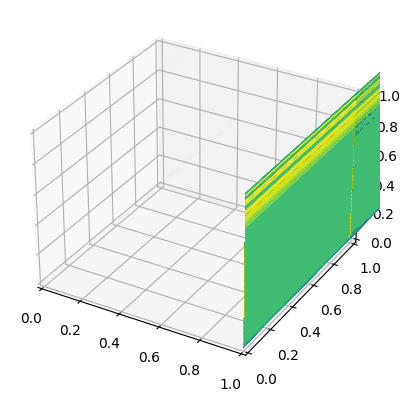

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate some sample data
x = df_encoded['varnishLevelsTotalvolume']
y = df_encoded['criticality_events']
z = df_encoded[['value_counters_modules']]

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(x, y, z, cmap='viridis')

# Customize the plot
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Plot')

# Show the plot
plt.show()

In [18]:
# diviser les données en ensembles de formation et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 8. Modèle

[Scikit learn SVM](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

In [19]:
# instancier un modèle SVM
#clf = svm.SVC(decision_function_shape='ovo')
# ajuster le modèle aux données d'entraînement
#clf.fit(X_train, y_train)
# évaluer le modèle sur l'ensemble de test
#accuracy = clf.score(X_test, y_test)
#print("Accuracy:", accuracy)

In [20]:
clf_svm = svm.SVC(decision_function_shape='ovo', gamma='scale', C=1, kernel='linear', verbose=1)
clf_svm.fit(X_train[:1000], y_train[:1000])

[LibSVM]

SVC(C=1, decision_function_shape='ovo', kernel='linear', verbose=1)

In [21]:
clf_svm.get_params()

{'C': 1,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovo',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': 1}

In [23]:
accuracy = clf_svm.score(X_test[:1000], y_test[:1000])

In [24]:
accuracy

0.739

In [28]:
clf_svm.support_vectors_

array([[0.35358566, 0.73144102, 0.80720591, ..., 0.        , 0.        ,
        0.        ],
       [0.35059761, 0.88612555, 0.91445519, ..., 0.        , 0.        ,
        0.        ],
       [0.32370518, 0.96657809, 0.53600212, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.37549801, 0.78313903, 0.85797317, ..., 0.        , 0.        ,
        0.        ],
       [0.31175299, 0.8169351 , 0.29732887, ..., 0.        , 0.        ,
        0.        ],
       [0.37549801, 0.77314705, 0.12041204, ..., 0.        , 0.        ,
        0.        ]])

In [11]:
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline

# Always scale the input. The most convenient way is to use a pipeline.
scaler = StandardScaler()
clf = SGDClassifier(max_iter=1000, tol=1e-3)
clf_sgd = make_pipeline(scaler, clf)
#Pipeline(steps=[('standardscaler', scaler), ('sgdclassifier', sgd_clf)])


In [12]:
clf_sgd.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('sgdclassifier', SGDClassifier())],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'sgdclassifier': SGDClassifier(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'sgdclassifier__alpha': 0.0001,
 'sgdclassifier__average': False,
 'sgdclassifier__class_weight': None,
 'sgdclassifier__early_stopping': False,
 'sgdclassifier__epsilon': 0.1,
 'sgdclassifier__eta0': 0.0,
 'sgdclassifier__fit_intercept': True,
 'sgdclassifier__l1_ratio': 0.15,
 'sgdclassifier__learning_rate': 'optimal',
 'sgdclassifier__loss': 'hinge',
 'sgdclassifier__max_iter': 1000,
 'sgdclassifier__n_iter_no_change': 5,
 'sgdclassifier__n_jobs': None,
 'sgdclassifier__penalty': 'l2',
 'sgdclassifier__power_t': 0.5,
 'sgdclassifier__random_state': None,
 'sgdclassifier__shuffle': True,
 'sgdclassifier__tol': 0.001,
 'sgdclassifier__validation_fraction': 0.1,
 'sgdclassifier__verbose': 0,


In [ ]:
clf_sgd.fit(X_train[:1000], y_train[:1000])

In [ ]:
# Enable autologging
mlflow.autolog(log_models=False, exclusive=True)
mlflow.sklearn.autolog(log_models=True)

In [ ]:
# Start MLflow tracking
mlflow.start_run()
run = mlflow.active_run()
print("Active run_id: {}".format(run.info.run_id))

In [ ]:
# Log the model's parameters
# mlflow.log_param('sequence_length', sequence_length)
# mlflow.log_param('batch_size', batch_size)
# mlflow.log_param('epochs', epochs)
# mlflow.log_param('learning_rate', learning_rate)
# mlflow.log_param('early_stopping_patience', patience)

### Entrainement

In [ ]:
# Train the SVM model
history = model.fit(X_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split=0.1,
                    callbacks=[early_stop, checkpoint],
                    shuffle=False)
                    
history = clf.fit(X_train, y_train)

In [ ]:
# Log the final training loss and accuracy
train_loss = history.history['loss'][-1]
train_accuracy = history.history['accuracy'][-1]
mlflow.log_metric('train_loss', train_loss)
mlflow.log_metric('train_accuracy', train_accuracy)

# Log the final validation loss and accuracy
val_loss = history.history['val_loss'][-1]
val_accuracy = history.history['val_accuracy'][-1]
mlflow.log_metric('val_loss', val_loss)
mlflow.log_metric('val_accuracy', val_accuracy)

In [ ]:

# Save the trained model with the schema
mlflow.keras.log_model(model, 'trained_model', signature=signature)

# Save the encoders and normalizer
joblib.dump(ohe, 'ohe.pkl')
joblib.dump(scaler, 'scaler.pkl')
mlflow.log_artifact('ohe.pkl')
mlflow.log_artifact('scaler.pkl')

# Log the example input JSON file as an artifact
mlflow.log_artifact("example_input.json")
from sklearn.metrics import precision_recall_fscore_support

# Predict on test set
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)
# Inverse transform the predictions and true labels
y_pred_labels = le.inverse_transform(y_pred)
y_test_labels = le.inverse_transform(y_test)

# Calculate and print accuracy, classification report, and confusion matrix
acc = accuracy_score(y_test_labels, y_pred_labels)
print(f'Accuracy: {acc}')

# Calculate loss score on test set
loss = model.evaluate(X_test, y_test, verbose=0)

# Print test loss score
print(f'Loss: {loss[0]}')

print(classification_report(y_test_labels, y_pred_labels))
print(confusion_matrix(y_test_labels, y_pred_labels))

# Calculate the classification report
report = classification_report(y_test_labels, y_pred_labels, output_dict=True)


with open("classification_report.txt", "w") as f:
    f.write(report)

# Extract the metrics for the 'error' class
error_precision = report['ERROR']['precision']
error_recall = report['ERROR']['recall']
error_f1_score = report['ERROR']['f1-score']


# Log the metrics to MLflow
mlflow.log_metric('error_precision', error_precision)
mlflow.log_metric('error_recall', error_recall)
mlflow.log_metric('error_f1_score', error_f1_score)

# Log the classification report 
mlflow.log_artifact('classification_report.txt')

# Predict on test set
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)
# Inverse transform the predictions and true labels
y_pred_labels = le.inverse_transform(y_pred)
y_test_labels = le.inverse_transform(y_test)

# Calculate and print accuracy, classification report, and confusion matrix
acc = accuracy_score(y_test_labels, y_pred_labels)
print(f'Accuracy: {acc}')

# Calculate loss score on test set
loss = model.evaluate(X_test, y_test, verbose=0)

# Print test loss score
print(f'Loss: {loss[0]}')



# Save confusion matrix
confusion_mtx = confusion_matrix(y_test_labels, y_pred_labels)
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt="d", cmap="Blues", ax=ax)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png')



# Log the confusion matrix to MLflow
mlflow.log_artifact('classification_report.txt')
mlflow.log_artifact('confusion_matrix.png')

# Plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.savefig('training_and_validation_loss.png')
plt.show()


# Plot accuracy from the loaded training history
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.savefig('training_and_validation_accuracy.png')
plt.show()

mlflow.log_artifact('training_and_validation_loss.png')
mlflow.log_artifact('training_and_validation_accuracy.png')

# Print class names and their corresponding numerical values
class_mapping = dict(zip(le.classes_, range(len(le.classes_))))
print("Class mapping:", class_mapping)

# Get the last 100 real and predicted values
y_test_last50 = y_test_labels[-200:]
y_pred_last50 = y_pred_labels[-200:]

# Create a line chart to visualize the real and predicted values
plt.figure(figsize=(14, 6))
plt.plot(y_test_last50, label='Real', marker='o')
plt.plot(y_pred_last50, label='Predicted', marker='x')
plt.xlabel('Time Steps')
plt.ylabel('Criticality Events')
plt.legend()
plt.title('Comparison of Real and Predicted Criticality Events (Last 200)')
plt.savefig('real_and_predicted.png')
plt.show()

mlflow.log_artifact('real_and_predicted.png')

# End MLflow tracking
mlflow.end_run()

In [15]:
# import pandas as pd
# from sklearn import svm
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.metrics import confusion_matrix, classification_report
# import mlflow

# # Diviser les données en ensembles de formation et de test
# #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Définir les paramètres du modèle
# parameters = {"C": [1,10], "kernel": ("linear","rbf"), "gamma": "scale"}

# # Débuter le suivi MLflow
# mlflow.start_run()

# # Instancier un modèle SVM avec les paramètres définis
# svc = svm.SVC(decision_function_shape="ovo")

# # Effectuer une recherche de grille pour trouver les meilleurs paramètres
# clf = GridSearchCV(svc, parameters, cv=5)

# # Entraîner le modèle et obtenir la précision
# svc.fit(X_train, y_train)

# # Prédire les classes pour les données de test
# y_pred = svc.predict(X_test)

# # Obtenir la précision du modèle pour l'ensemble de test
# accuracy_clf_svm = svc.score(X_test, y_test)

# # Enregistrer les paramètres et la précision dans MLflow
# mlflow.log_params(parameters)
# mlflow.log_metric("accuracy", accuracy_clf_svm)

# # Terminer le suivi MLflow
# mlflow.end_run()

# # Afficher la matrice de confusion et le rapport de classification
# print("Matrice de confusion :\n", confusion_matrix(y_test, y_pred))
# print("\nRapport de classification :\n", classification_report(y_test, y_pred))

# # Afficher les meilleurs paramètres trouvés
# print("\nMeilleurs paramètres trouvés :", clf.best_params_)

Matrice de confusion :
 [[683460      0      0      0]
 [     0  13223    379      0]
 [     0    895   1627      0]
 [     0   1701    461    341]]

Rapport de classification :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    683460
           1       0.84      0.97      0.90     13602
           2       0.66      0.65      0.65      2522
           3       1.00      0.14      0.24      2503

    accuracy                           1.00    702087
   macro avg       0.87      0.69      0.70    702087
weighted avg       1.00      1.00      0.99    702087



AttributeError: 'GridSearchCV' object has no attribute 'best_params_'